Actual weights are:  [[0.2]
 [0.7]
 [0.2]]
Predicted weights are:  [[0.2]
 [0.7]
 [0.2]]


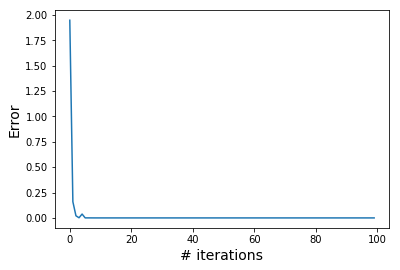

In [6]:
import numpy as np
from operator import sub
import matplotlib.pyplot as plt

#---------------------- Initialization --------------------------
# Initializing random input from (-0.5, 0.5)
X = np.random.randn(20000) - 0.5
num_iterations = 100
actual_weights = np.matrix([[0.2, 0.7, 0.2]])
# Initializing random weights between (0, 1)
predicted_weights = np.matrix(np.zeros((actual_weights.shape)))
predicted_weights = predicted_weights.transpose()
actual_weights = actual_weights.transpose()
errors = []
eta = 1092
R_k_inverse = eta * np.identity(actual_weights.shape[0])

#---------------------- RLS Algorithm ---------------------------
for index in range(0, num_iterations):
    x = np.matrix([X[i] for i in range(index, index + actual_weights.shape[0])])
    x = x.transpose()
    
    actual_output = np.multiply(actual_weights, x)
    predicted_output = np.multiply(predicted_weights, x)
    error = actual_output - predicted_output
    
    errors.append(np.sum(error) * np.sum(error))
    
    Z_k = R_k_inverse * x
    
    q = x.transpose() * Z_k
    
    v = 1 / (1 + q)
    
    Z_k_cap = np.multiply(v,  Z_k)
    predicted_weights = predicted_weights + np.multiply(error, Z_k_cap)
    
    R_k_inverse = R_k_inverse - Z_k_cap * Z_k_cap.transpose() 

plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Error', fontsize=14, color='black')

print("Actual weights are: ", actual_weights)
print("Predicted weights are: ", predicted_weights)